# Exercise 9
In this exercise, we solved the Traveling Salesman Problem, with a genetic algorithm, for a set of $34$ cities randomly distributed in two cases:
- inside a square of lenght $1$ ;
- on the circumference of a circle of radius $1$.

The fitness of a path has been calculated as:
$$F[\vec{c}_1,...,\vec{c}_{34} ]=\sum_{i=1}^{i=34} (x_i-x_{i+1})^2+(y_i+y_{i+1})^2$$
where $x_{35}=x_0$ and $y_{35}=y_0$

We used the following parameters:
- number of generations: $N_{gen}=2001$;
- number of parents: $N_{p}=500$;
- cross-over probability: $p_{s}=0.8$;
- probability for each mutation $p_m=0.03$.

To choose the individual $j$ to select, we used the following expression:
$$j=\lfloor{M \times r^p}\rfloor+1$$
where $r$ is a uniform random number $r\in[0,1)$, $p=0.15$ for the circle and $p=0.1$ for the square. 
For each generation, the new generation completely replaces the old one.

# PLOTS

circle -> Best fit of the last generation:  1.92008
circle -> Best Half average of the last generation:  1.92008
square -> Best fit of the last generation:  0.882829
square -> Best Half average of the last generation:  0.882829


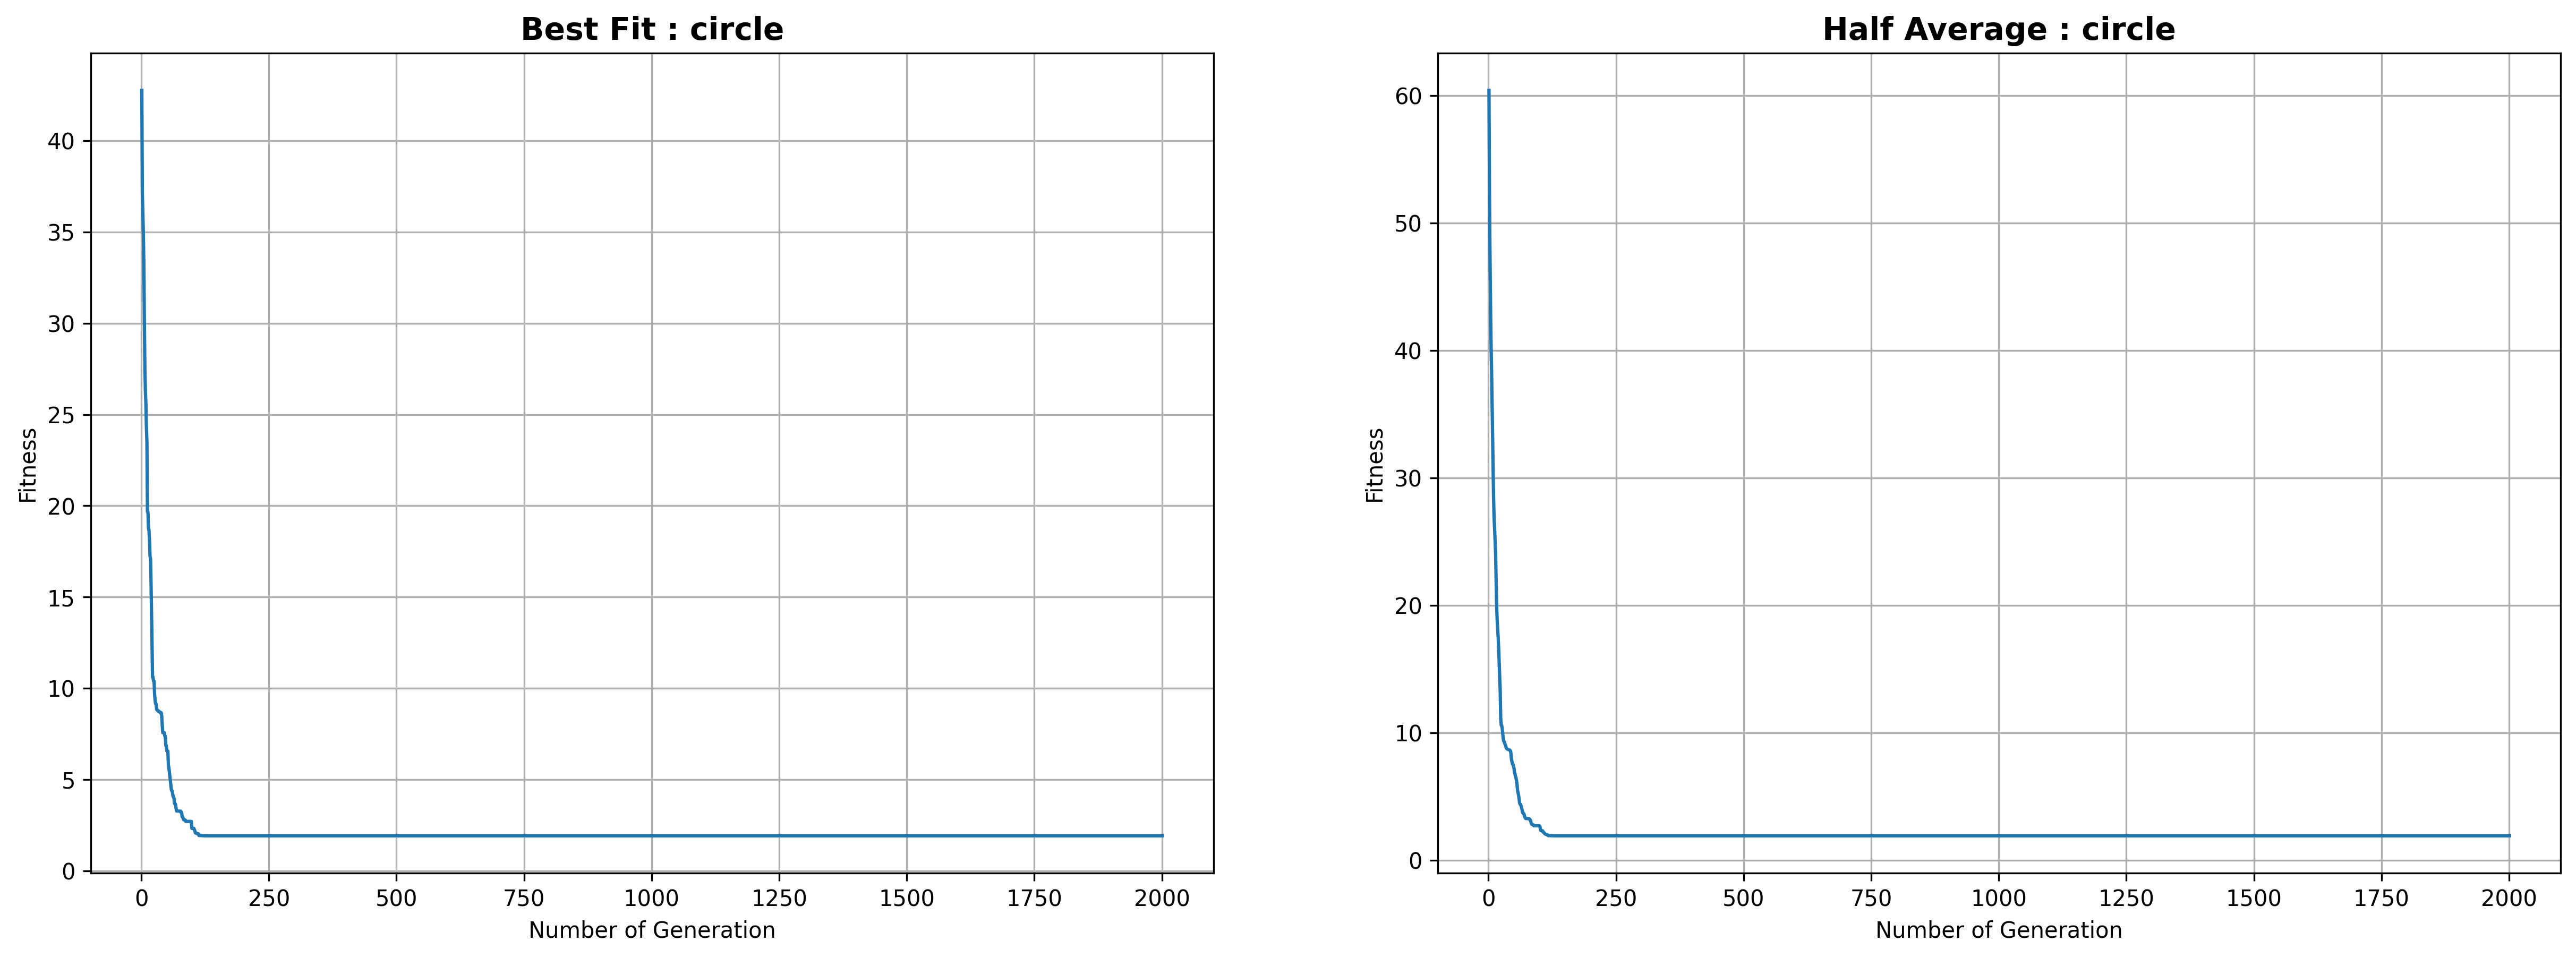

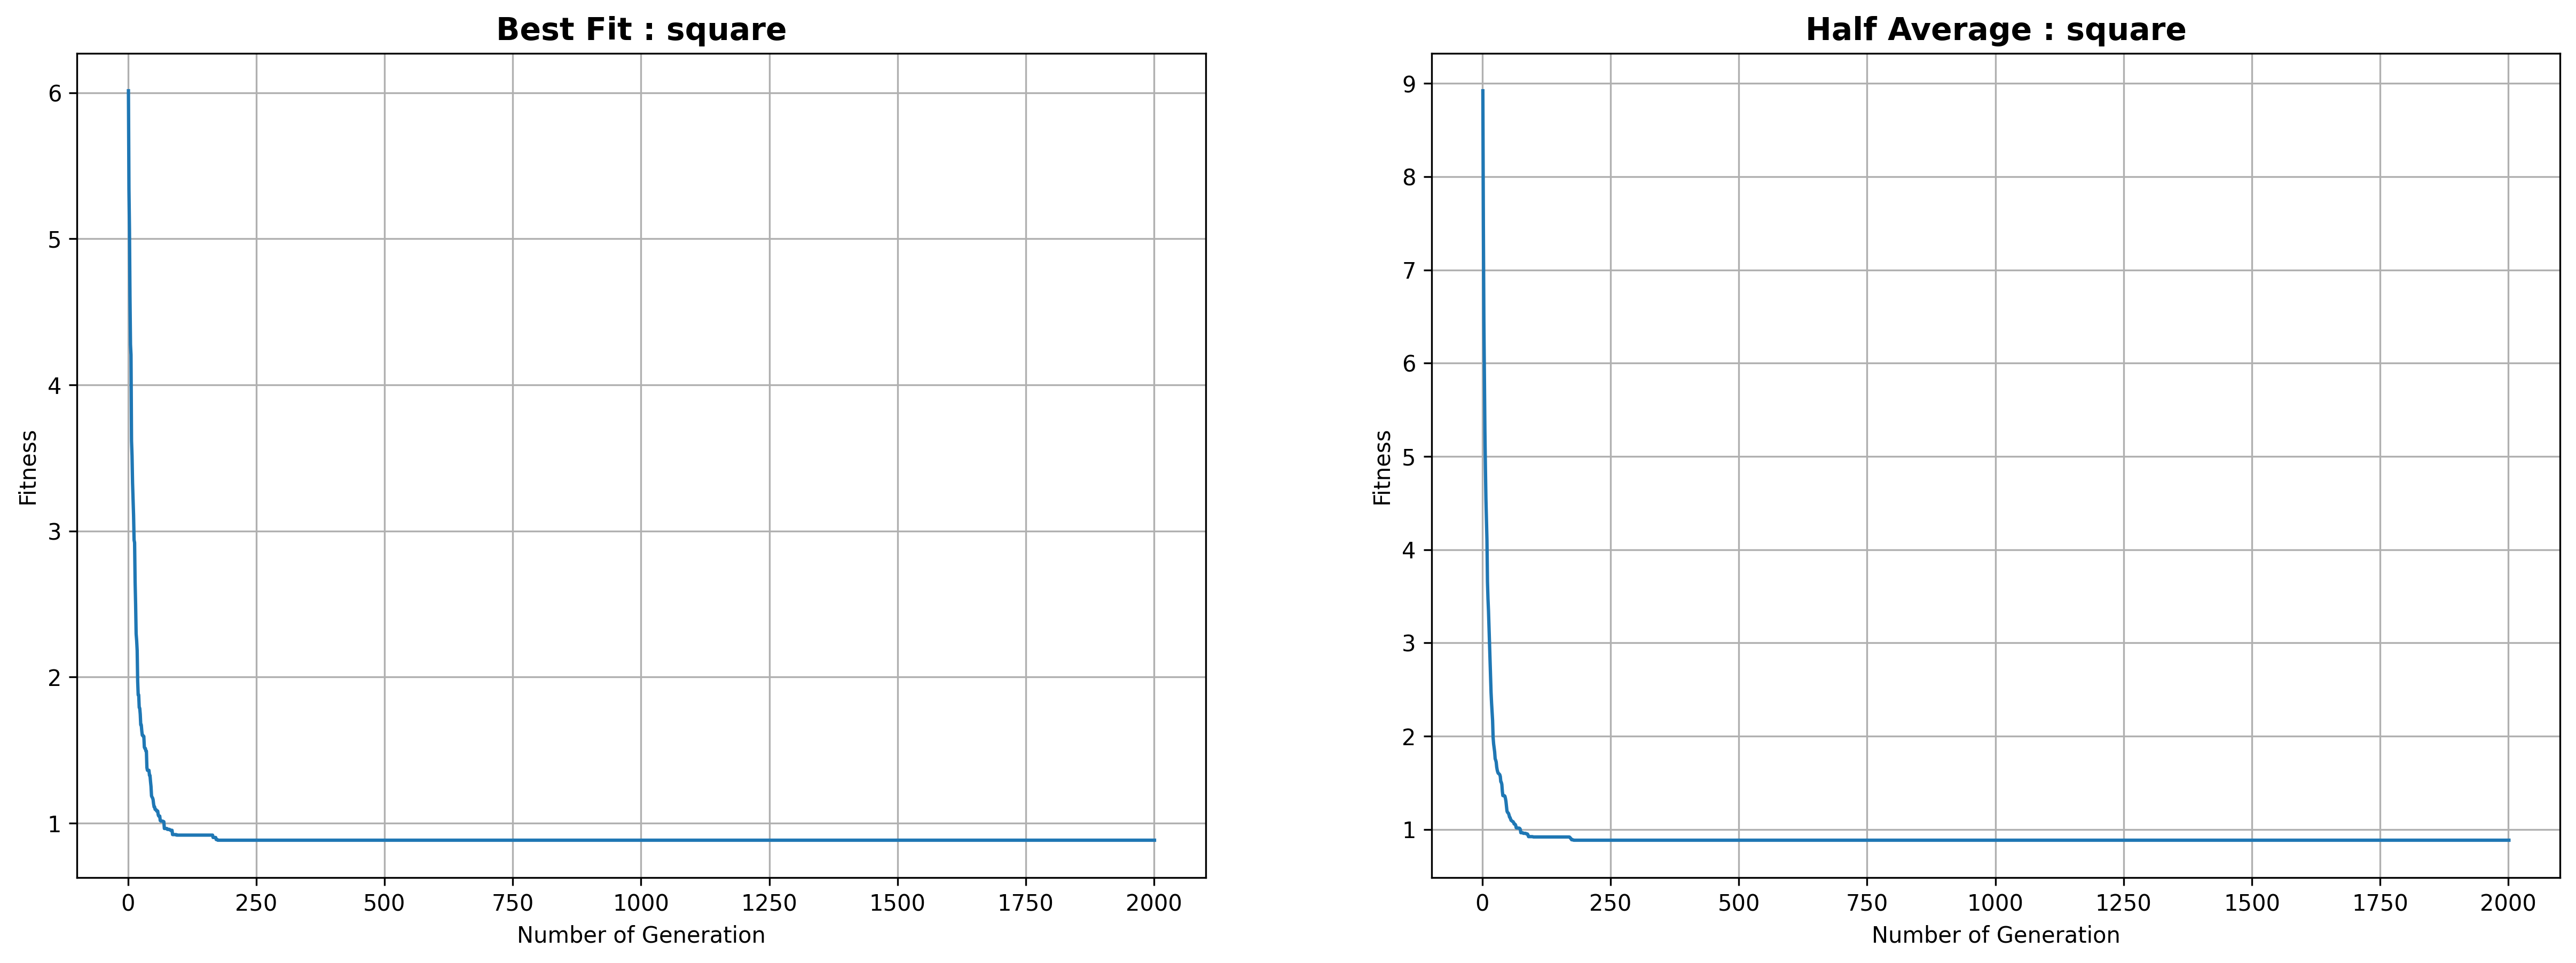

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
import scipy.optimize 
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib import animation 

method=["circle","square"]
Titles=["Best Fit : ","Half Average : "]

for i in method:
    fig=plt.figure(figsize=(20,15),dpi=300)
    #plt.suptitle(i,weight='bold')
    plt.subplot(221)
    x,y = np.loadtxt("9.1/"+i+"/output_best.dat", usecols=(0,1), delimiter=' ', unpack='true')
    
    plt.plot(x,y)
    plt.ylabel('Fitness')
    plt.xlabel("Number of Generation")
    plt.grid(True)
    #plt.legend()
    plt.title(Titles[0]+i,weight="bold",size="14")
    print(i,"-> Best fit of the last generation: ",y[len(y)-1])
    
    x,y = np.loadtxt("9.1/"+i+"/HalfAverage.dat", usecols=(0,1), delimiter=' ', unpack='true')
    plt.subplot(222)
    plt.plot(x,y)
    plt.ylabel('Fitness')
    plt.xlabel("Number of Generation")
    plt.grid(True)
    #plt.legend()
    plt.title(Titles[1]+i,weight="bold",size="14")
    print(i,"-> Best Half average of the last generation: ",y[len(y)-1])
    
    
    
plt.show()


    


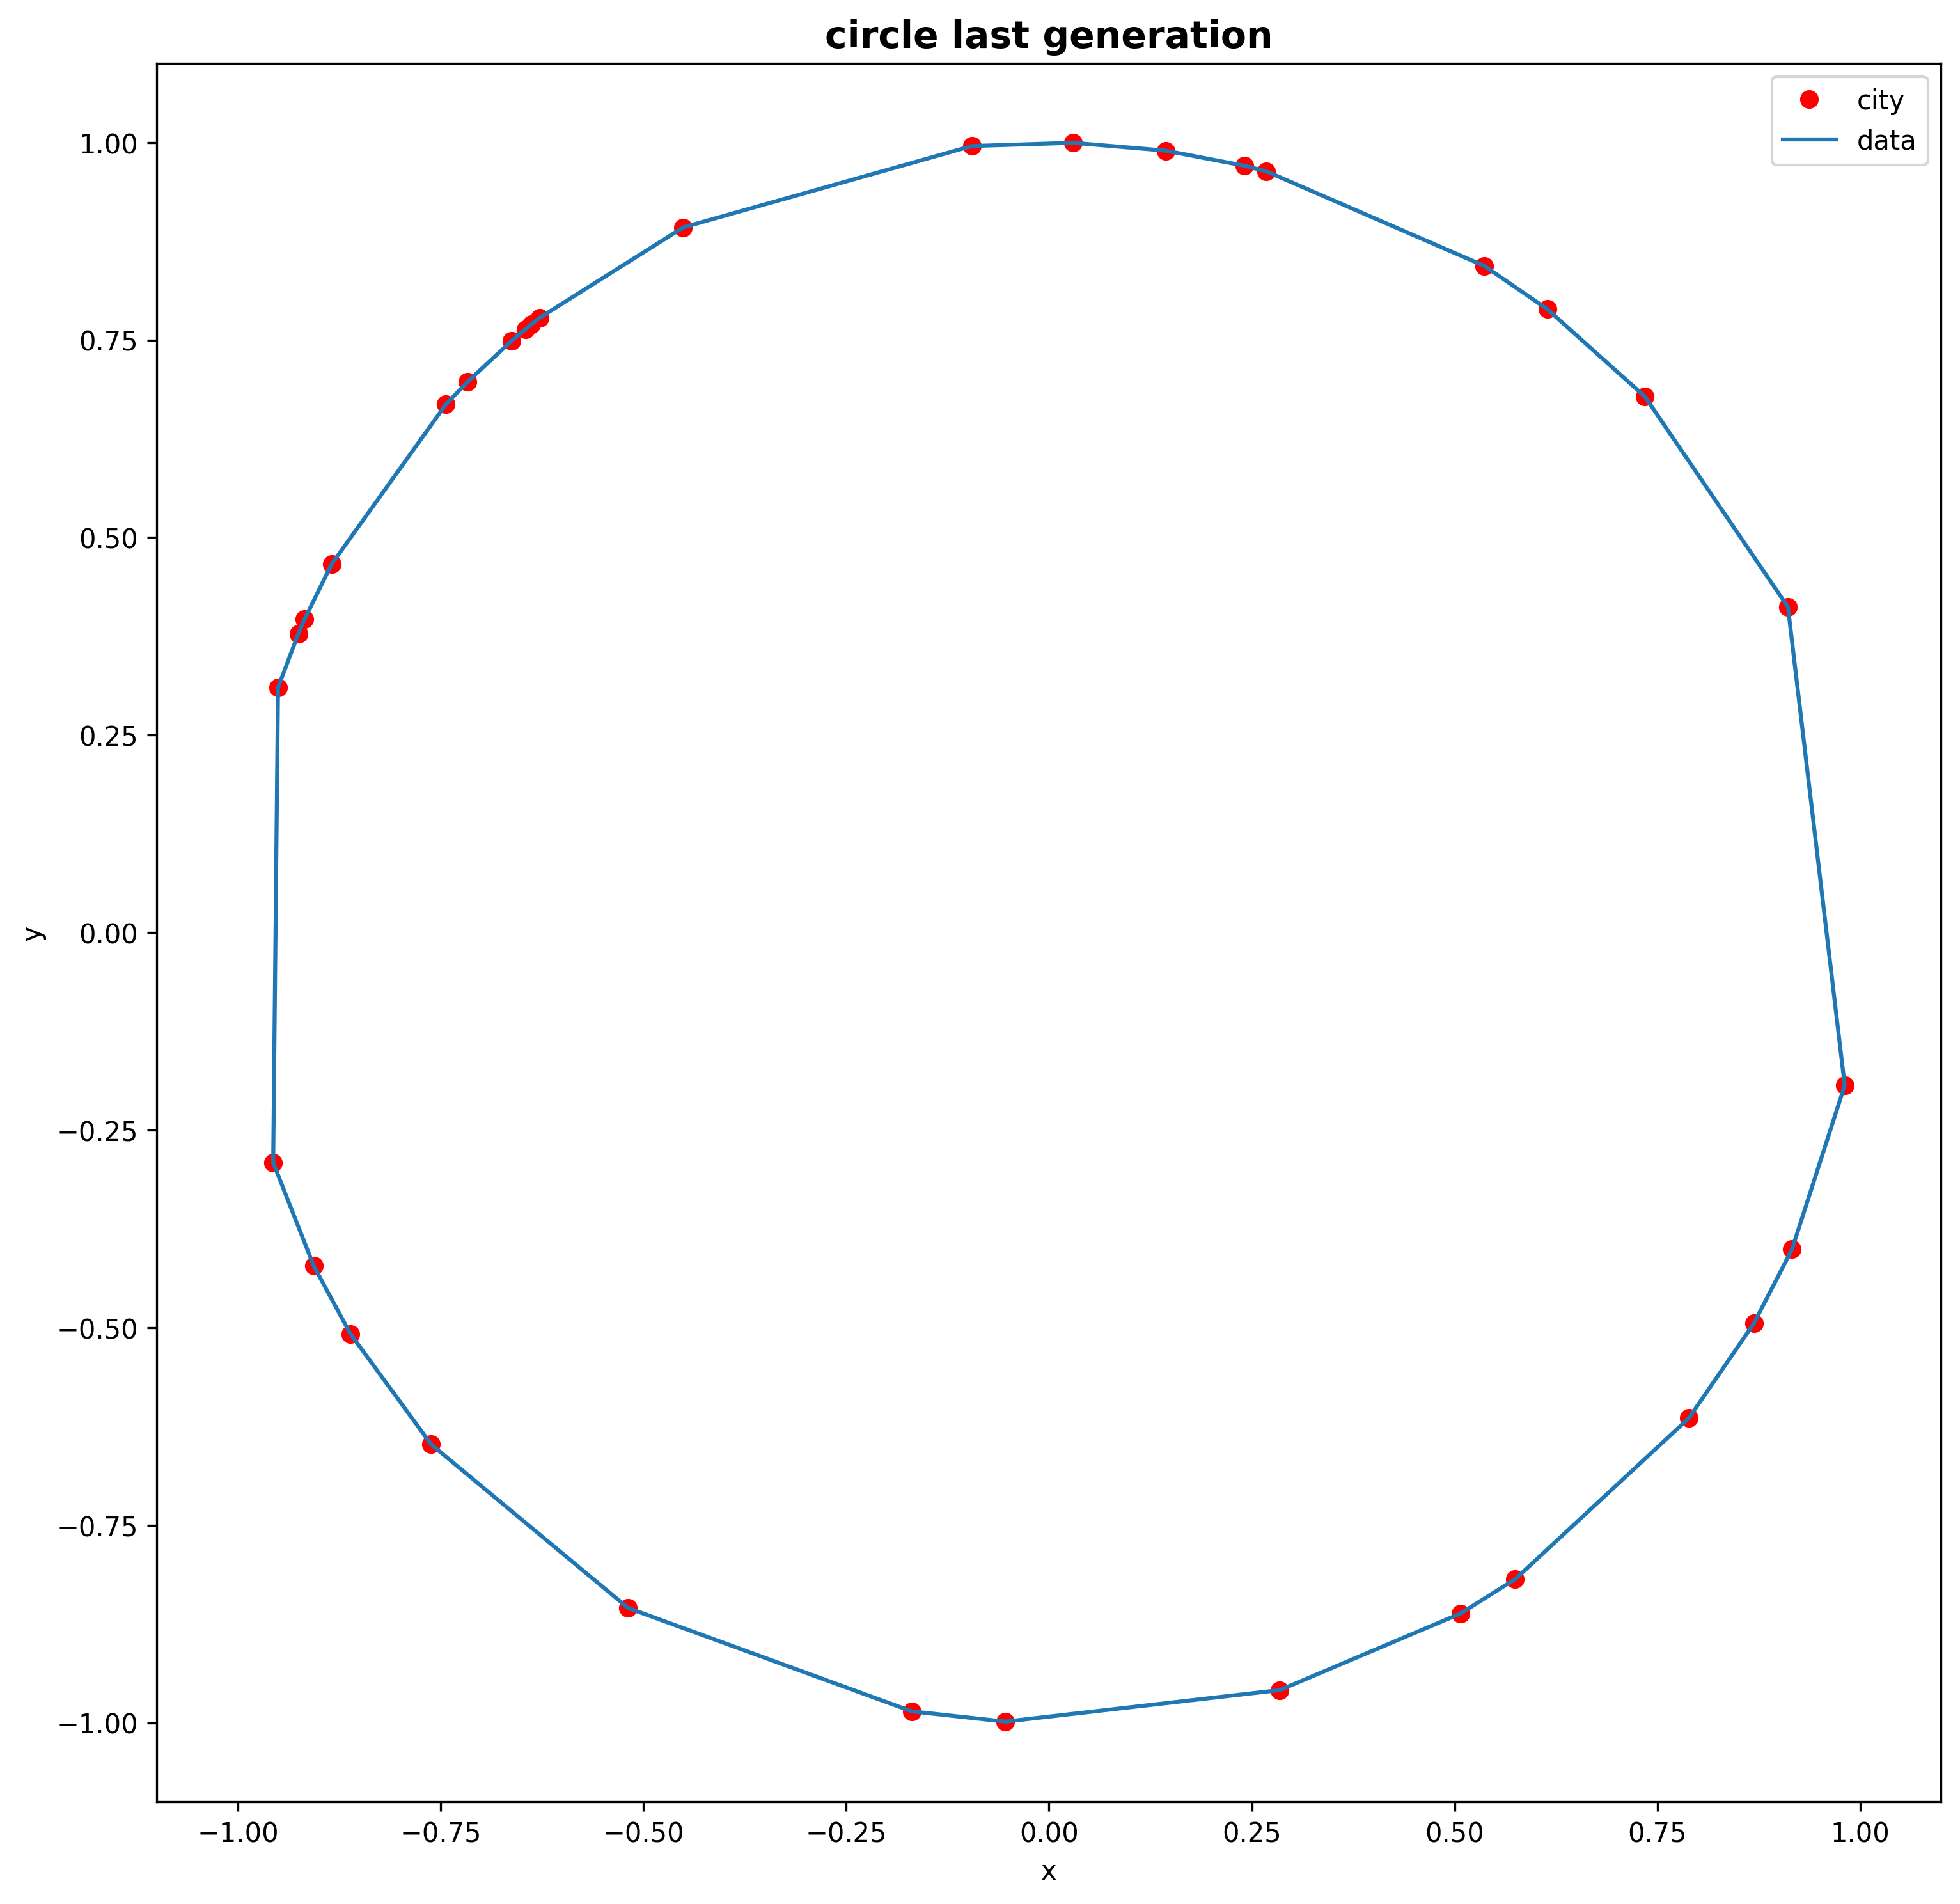

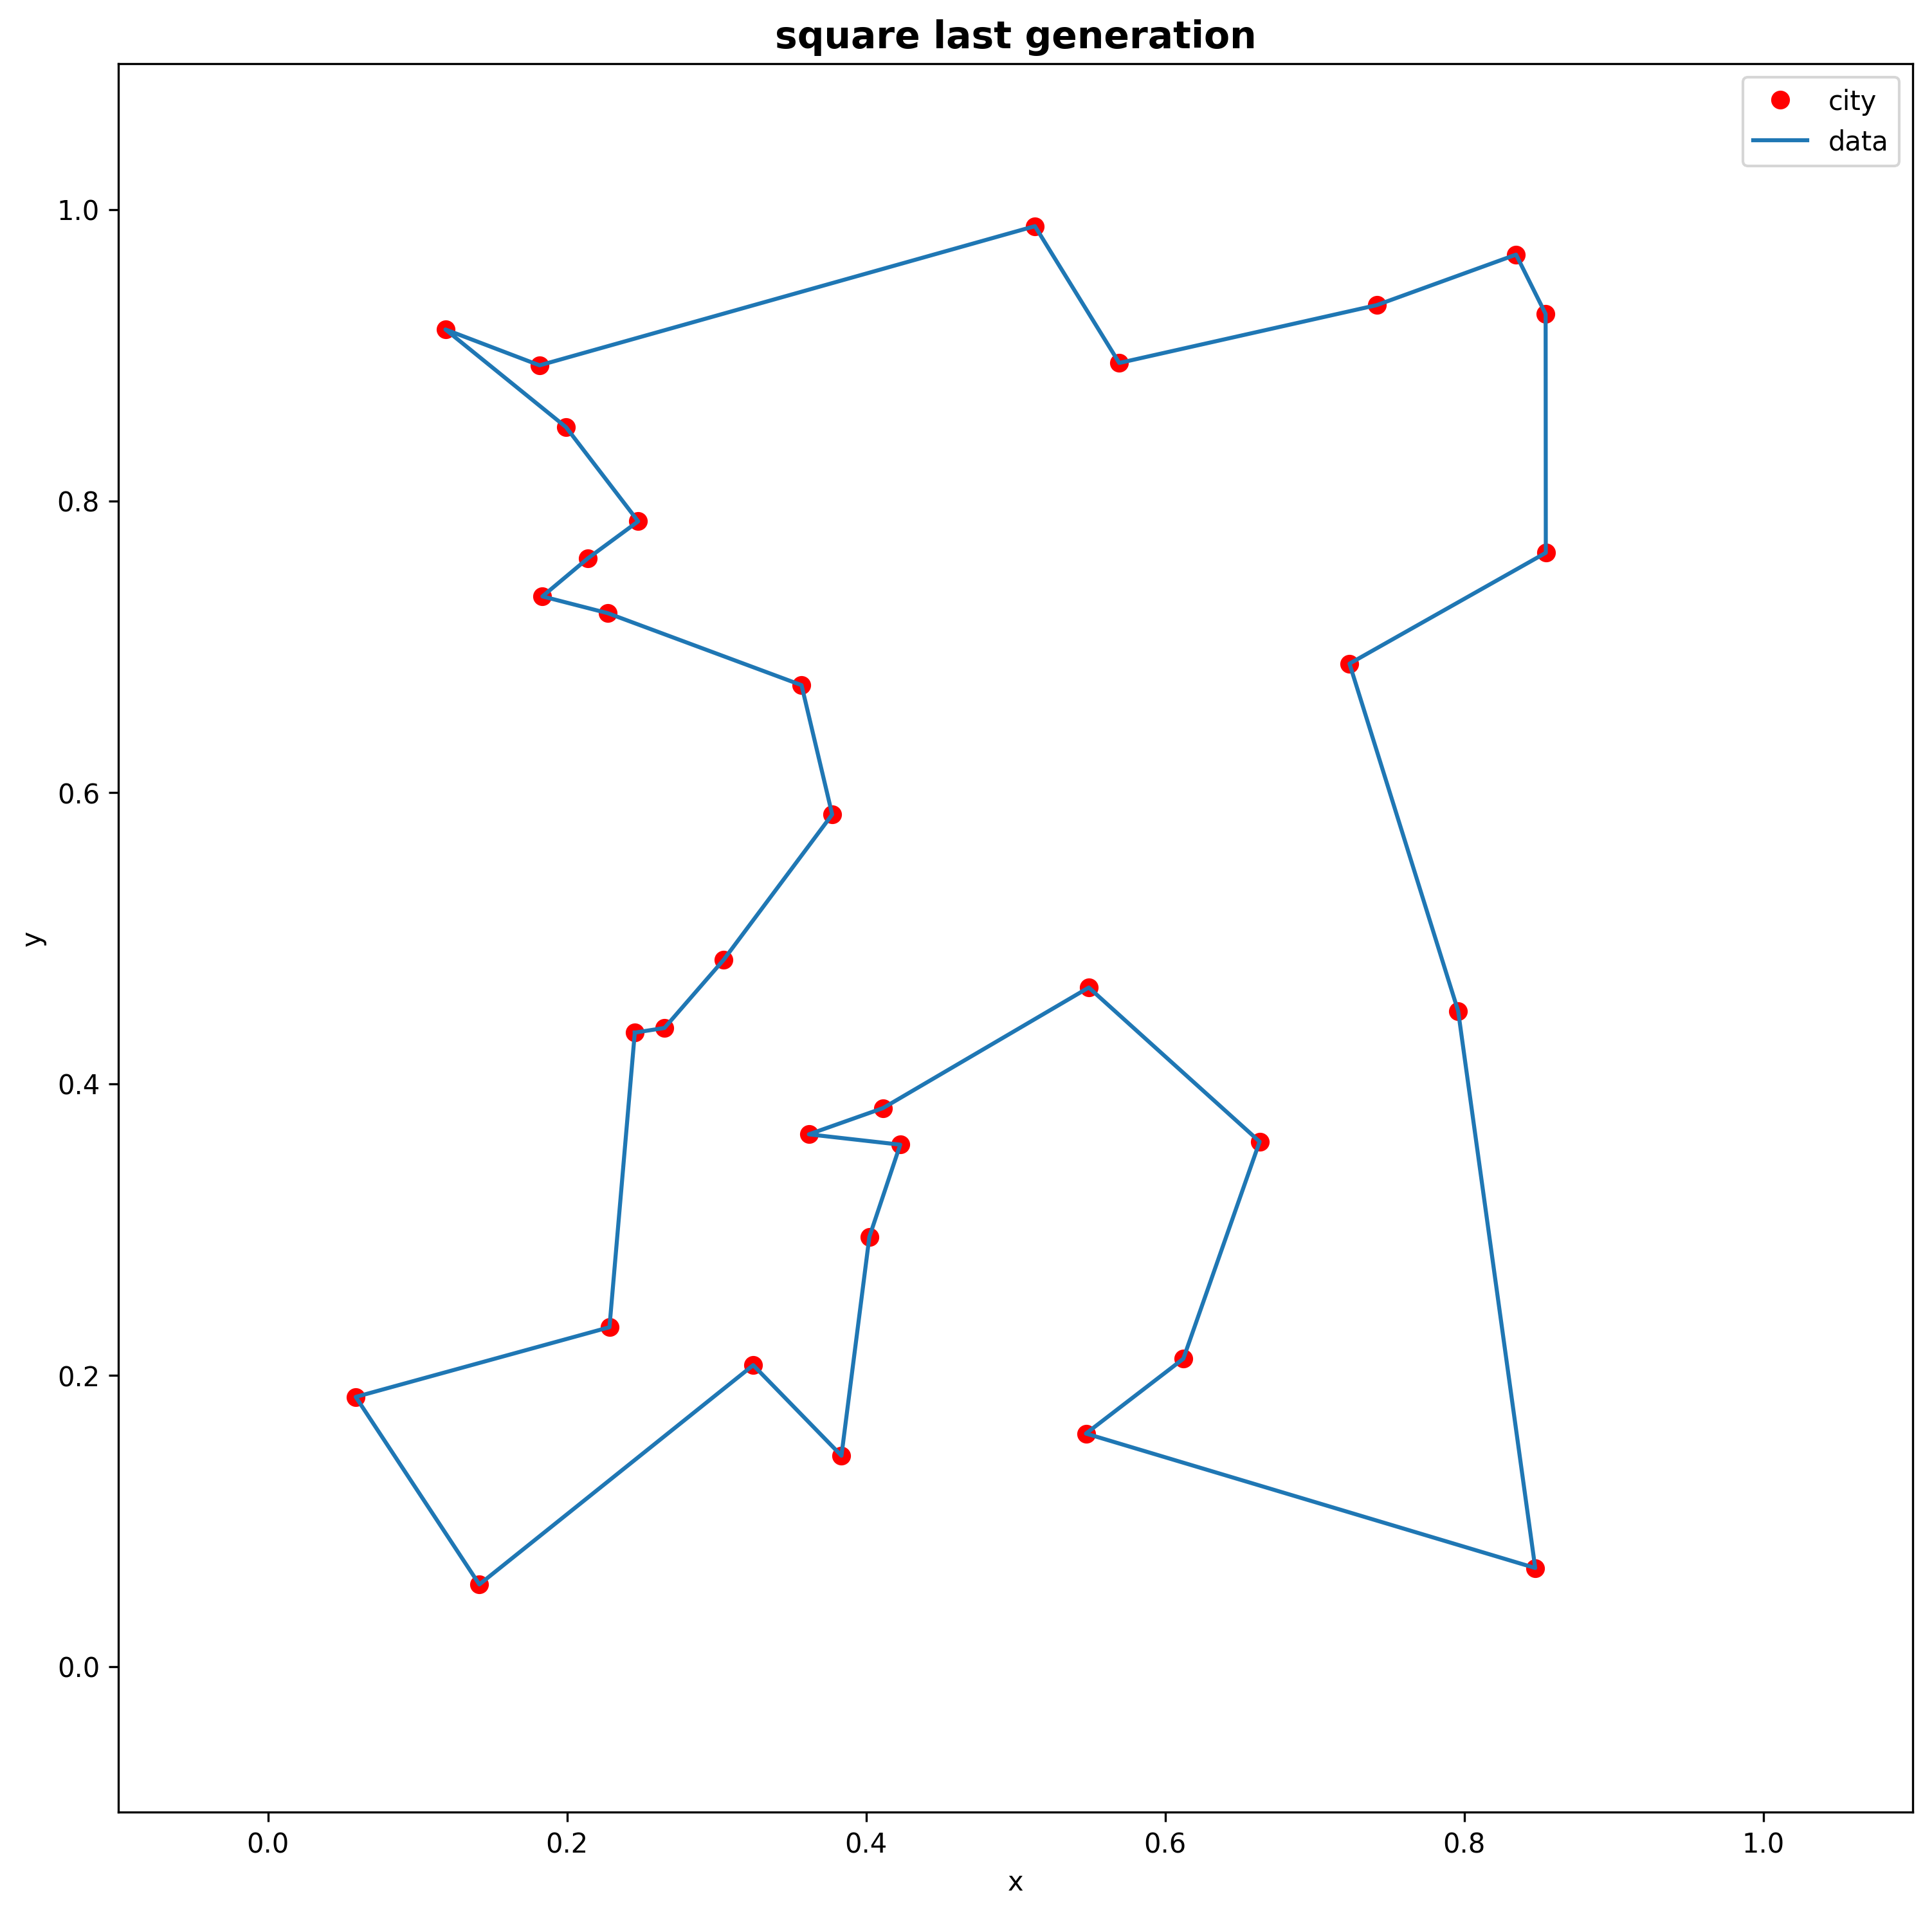

In [2]:
for t in method:
    i,x,y = np.loadtxt("9.1/"+t+"/Positions.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

    #data of best chromosome for each generation
    data=np.loadtxt("9.1/"+t+"/BestChr.dat")
    fig = plt.figure(figsize=(12,12),dpi=300)
    plt.plot(x,y,marker="o",linestyle="None",color="red",label="city")
    if t=="circle":
        plt.xlim(-1.1,1.1)
        plt.ylim(-1.1,1.1)
    else:
        plt.xlim(-0.1,1.1)
        plt.ylim(-0.1,1.1)

    plt.xlabel("x")
    plt.ylabel("y")
    xdata=[]
    ydata=[]
    for i in range(len(data[0])):
        xdata.append(x[int(data[len(data)-1][i])])
        ydata.append(y[int(data[len(data)-1][i])])
    xdata.append(x[int(data[len(data)-1][0])])
    ydata.append(y[int(data[len(data)-1][0])])
    
    
    plt.plot(xdata,ydata,label="data")
    plt.legend()
    plt.title(t+" last generation",weight="bold",size="14")
    plt.show()



# Animations
Note: on github these animations could be not animated, but in the folder "exercise9" there are two files .gif that should work.
## Circle
<img src="circle.gif" width="400">

## Square
<img src="square.gif" width="400">


# Code to make animations

In [3]:
%matplotlib notebook
i,x,y = np.loadtxt("9.1/circle/Positions.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#data of best chromosome for each generation
data=np.loadtxt("9.1/circle/BestChr.dat")
print("Number of generations: ",len(data))
fig = plt.figure(figsize=(8,8))
xdata=[]
ydata=[]
plt.plot(x,y,marker="o",linestyle="None",color="red")

line1, = plt.plot([], [], 'b', lw=2)

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Circle")
def drawframe(j): 
    for i in range(len(data[0])):
        xdata.append(x[int(data[j][i])])
        ydata.append(y[int(data[j][i])])
    xdata.append(x[int(data[j][0])])
    ydata.append(y[int(data[j][0])])
    
    
    line1.set_data(xdata[0:len(data[0])+1], ydata[0:len(data[0])+1]) 
    plt.title('Generation = {0:4d}'.format(j)) 
    
    xdata.clear()
    ydata.clear()
    
    return (line1)



# blit=True re-draws only the parts that have changed. 
anim = animation.FuncAnimation(fig, drawframe, frames=len(data), interval=50, blit=True)
#plt.show()

anim.save('circle.gif')
#HTML(anim.to_html5_video())



Number of generations:  2001


<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


In [4]:
i,x,y = np.loadtxt("9.1/square/Positions.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

#data of best chromosome for each generation
data=np.loadtxt("9.1/square/BestChr.dat")
print("Number of generations: ",len(data))
fig = plt.figure(figsize=(8,8))
xdata=[]
ydata=[]
plt.plot(x,y,marker="o",linestyle="None",color="red")

line1, = plt.plot([], [], 'b', lw=2)

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel("x")
plt.ylabel("y")
def drawframe(j): 
    for i in range(len(data[0])):
        xdata.append(x[int(data[j][i])])
        ydata.append(y[int(data[j][i])])
    xdata.append(x[int(data[j][0])])
    ydata.append(y[int(data[j][0])])
    
    
    line1.set_data(xdata[0:35], ydata[0:35]) 
    plt.title('Generation = {0:4d}'.format(j)) 
    
    xdata.clear()
    ydata.clear()
    
    return (line1)

# blit=True re-draws only the parts that have changed. 
anim = animation.FuncAnimation(fig, drawframe, frames=len(data), interval=50, blit=True)
#plt.show()
anim.save('square.gif')
#HTML(anim.to_html5_video())


Number of generations:  2001


<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.
